<center> <h1> Laptop Price Prediction </h1></center>



## Importing nessecary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and feature Extraction

In [2]:
df = pd.read_csv('Cleaned_Laptop_data.csv')
df

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,Celeron,Intel,5,Missing,4.0,Cooling,0,1024,Windows,64,0,Casual,15.6,1,No,No,23990.0
1,ASUS,VivoBook,Intel,5,10th,4.0,DDR3,512,0,Windows,64,0,Casual,15.6,1,No,No,37990.0
2,ASUS,Vivobook,Intel,A6-9225 Processor,10th,4.0,DDR3,0,1024,Windows,64,0,Casual,14.1,1,No,No,NaN
3,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,1,No,Yes,54990.0
4,HP,Core,Intel,APU Dual,11th,4.0,DDR3,512,0,Windows,64,0,ThinNlight,15.6,0,No,No,54990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,DELL,Inspiron,AMD,Ryzen 9,Missing,16.0,Unified,512,0,Windows,64,0,ThinNlight,15.6,0,No,No,42090.0
841,HP,Pavilion,AMD,Ryzen 9,Missing,16.0,Unified,512,0,Windows,64,4,Gaming,15.6,1,No,Yes,64990.0
842,ASUS,EeeBook,Intel,Ryzen 9,Missing,16.0,Unified,0,0,Windows,64,0,Casual,0,0,No,No,22990.0
843,HP,Pavilion,AMD,Slot for,Missing,16.0,Unified,512,0,Windows,64,2,Casual,14,1,No,Yes,79990.0


In [3]:
df.shape

(845, 18)

## Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            845 non-null    object 
 1   model            845 non-null    object 
 2   processor_brand  845 non-null    object 
 3   processor_Name   845 non-null    object 
 4   processor_gnrtn  845 non-null    object 
 5   ram_gb           845 non-null    float64
 6   Apps             845 non-null    object 
 7   ssd              845 non-null    int64  
 8   hdd              845 non-null    int64  
 9   os               845 non-null    object 
 10  os_bit           845 non-null    int64  
 11  graphic_card_gb  845 non-null    int64  
 12  weight           845 non-null    object 
 13  display_size     845 non-null    object 
 14  warranty         845 non-null    int64  
 15  Touchscreen      845 non-null    object 
 16  msoffice         845 non-null    object 
 17  Price           

## Checking Missing Data

In [5]:
df.isnull().sum()

brand              0
model              0
processor_brand    0
processor_Name     0
processor_gnrtn    0
ram_gb             0
Apps               0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
Price              3
dtype: int64

## Missing Data Treatment

In [6]:
df['processor_gnrtn'].value_counts()

processor_gnrtn
11th       334
Missing    304
10th       162
8th         27
7th          9
9th          5
12th         3
4th          1
Name: count, dtype: int64

Here we can see that : in the 'processor_gnrtn' there are 304 Missing values which are named with "Missing". In that case we don't know which generation they belong or we cannot just give those a rondom number in this case, also we need to clean those value into integer to get the numbers only for other values too... 

So for that, we need to replace all those missing values to 0 and other values to their respective integer value so that it won't affect in future analysis.

In [7]:
df['processor_gnrtn'] = df['processor_gnrtn'].str.replace('th', '').str.replace('Missing', '0')

In [8]:
df['processor_gnrtn'].value_counts()

processor_gnrtn
11    334
0     304
10    162
8      27
7       9
9       5
12      3
4       1
Name: count, dtype: int64

In [9]:
df['ram_gb'].value_counts()

ram_gb
8.0     503
16.0    233
4.0     102
15.6      6
5.0       1
Name: count, dtype: int64

In [10]:
df['ssd'].value_counts()

ssd
512     405
256     188
0       129
1024    109
128      10
2048      2
3072      1
32        1
Name: count, dtype: int64

In [11]:
df['hdd'].value_counts()

hdd
0       699
1024    144
512       2
Name: count, dtype: int64

In [12]:
df['os_bit'].value_counts()

os_bit
64    722
32    123
Name: count, dtype: int64

In [13]:
df['graphic_card_gb'].value_counts()

graphic_card_gb
0    590
4    134
2     64
6     40
8     17
Name: count, dtype: int64

In [14]:
df['display_size'].value_counts()

display_size
15.6     358
14       268
13.3      77
0         58
17.3      13
14.96      9
16         8
14.1       7
16.1       7
13         7
13.4       7
15         6
13.5       6
16.2       3
14.2       3
12.2       2
14.9       1
15.3       1
All        1
6th        1
8th        1
12         1
Name: count, dtype: int64

In [15]:
df['display_size'] = df['display_size'].str.replace('All', '0').str.replace('th', '')

In [16]:
df['warranty'].value_counts()

warranty
1    501
0    302
2     29
3     13
Name: count, dtype: int64

In [17]:
df['Touchscreen'].value_counts()

Touchscreen
No     744
Yes    101
Name: count, dtype: int64

In [18]:
df['Price'].value_counts()

Price
54990.0     15
59990.0     15
99990.0     15
64990.0     14
79990.0     13
            ..
53400.0      1
122990.0     1
74590.0      1
57900.0      1
86999.0      1
Name: count, Length: 403, dtype: int64

In [19]:
df.dtypes

brand               object
model               object
processor_brand     object
processor_Name      object
processor_gnrtn     object
ram_gb             float64
Apps                object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
Price              float64
dtype: object

In [20]:
df['processor_gnrtn'] = df['processor_gnrtn'].astype(int)
df['ram_gb'] = df['ram_gb'].astype(int)
df['display_size'] = df['display_size'].astype(float)


In [21]:
df.dtypes

brand               object
model               object
processor_brand     object
processor_Name      object
processor_gnrtn      int32
ram_gb               int32
Apps                object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight              object
display_size       float64
warranty             int64
Touchscreen         object
msoffice            object
Price              float64
dtype: object

## Duplicate Checking

In [22]:
df.duplicated().sum()

9

In [23]:
df = df.drop_duplicates()
df

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,Celeron,Intel,5,0,4,Cooling,0,1024,Windows,64,0,Casual,15.6,1,No,No,23990.0
1,ASUS,VivoBook,Intel,5,10,4,DDR3,512,0,Windows,64,0,Casual,15.6,1,No,No,37990.0
2,ASUS,Vivobook,Intel,A6-9225 Processor,10,4,DDR3,0,1024,Windows,64,0,Casual,14.1,1,No,No,NaN
3,HP,Core,Intel,APU Dual,11,4,DDR3,512,0,Windows,64,0,ThinNlight,15.6,1,No,Yes,54990.0
4,HP,Core,Intel,APU Dual,11,4,DDR3,512,0,Windows,64,0,ThinNlight,15.6,0,No,No,54990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,DELL,Inspiron,AMD,Ryzen 9,0,16,Unified,512,0,Windows,64,0,ThinNlight,15.6,0,No,No,42090.0
841,HP,Pavilion,AMD,Ryzen 9,0,16,Unified,512,0,Windows,64,4,Gaming,15.6,1,No,Yes,64990.0
842,ASUS,EeeBook,Intel,Ryzen 9,0,16,Unified,0,0,Windows,64,0,Casual,0.0,0,No,No,22990.0
843,HP,Pavilion,AMD,Slot for,0,16,Unified,512,0,Windows,64,2,Casual,14.0,1,No,Yes,79990.0


In [24]:
df.isnull().sum()

brand              0
model              0
processor_brand    0
processor_Name     0
processor_gnrtn    0
ram_gb             0
Apps               0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
Price              3
dtype: int64

#### Fill Null Values
Here are three values in price column is null. to fill those null values we can take several way. some of them can take mean value or take mode value or any other else. 



Here in Price matter we can't implement directly about the price variation for different models. 
for that we need to check that if there's another row exist in this dataframe or not where the price is not null.. among the same models of if we can take mean value for that perticular missing through fitering, then it can be a solution

In [25]:
null_price_rows = df[df['Price'].isnull()]
null_price_rows


,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
2,ASUS,Vivobook,Intel,A6-9225 Processor,10,4,DDR3,0,1024,Windows,64,0,Casual,14.1,1,No,No,NaN
26,DELL,Inspiron,Intel,Celeron Dual,11,4,DDR4,256,1024,Windows,64,0,Casual,15.6,0,No,No,NaN
64,HP,Pavilion,AMD,Core i3,0,4,DDR4,256,1024,Windows,64,4,Gaming,15.6,1,No,Yes,NaN


In [26]:
filtered_rows_asus = df[(df['model'] == 'Vivobook')]
filtered_rows_asus 


,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
2,ASUS,Vivobook,Intel,A6-9225 Processor,10,4,DDR3,0,1024,Windows,64,0,Casual,14.1,1,No,No,NaN
36,ASUS,Vivobook,Intel,Core i3,10,4,DDR4,512,0,Windows,64,4,Gaming,15.6,0,No,No,61990.0
39,ASUS,Vivobook,Intel,Core i3,10,4,DDR4,256,1024,Windows,64,4,Gaming,15.6,0,No,No,55990.0
62,ASUS,Vivobook,Intel,Core i3,11,4,DDR4,256,0,Windows,64,0,Casual,14.0,1,No,Yes,37890.0
117,ASUS,Vivobook,Intel,Core i3,11,8,DDR4,256,1024,Windows,64,0,Casual,14.1,1,No,Yes,41890.0
142,ASUS,Vivobook,Intel,Core i3,11,8,DDR4,512,0,Windows,64,4,Casual,14.0,1,No,No,73490.0
201,ASUS,Vivobook,Intel,Core i5,11,8,DDR4,256,1024,Windows,64,2,Casual,15.6,1,No,Yes,60190.0
206,ASUS,Vivobook,Intel,Core i5,11,8,DDR4,512,0,Windows,64,0,ThinNlight,14.1,1,No,Yes,41990.0
221,ASUS,Vivobook,Intel,Core i5,9,8,DDR4,512,0,Windows,64,4,Gaming,15.6,1,No,Yes,54990.0
228,ASUS,Vivobook,Intel,Core i5,9,8,DDR4,256,1024,Windows,64,4,Gaming,15.6,0,No,No,54490.0


In [27]:
mean_price_asus = filtered_rows_asus['Price'].mean()
mean_price_asus

59548.02777777778

In [28]:
df.loc[(df['model'] == 'Vivobook') & (df['Price'].isnull()), 'Price'] = mean_price_asus

In [29]:
null_price_rows = df[df['Price'].isnull()]
null_price_rows

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
26,DELL,Inspiron,Intel,Celeron Dual,11,4,DDR4,256,1024,Windows,64,0,Casual,15.6,0,No,No,NaN
64,HP,Pavilion,AMD,Core i3,0,4,DDR4,256,1024,Windows,64,4,Gaming,15.6,1,No,Yes,NaN


In [30]:
filtered_rows_dell = df[df['model'] == 'Inspiron']
filtered_rows_dell

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
26,DELL,Inspiron,Intel,Celeron Dual,11,4,DDR4,256,1024,Windows,64,0,Casual,15.60,0,No,No,NaN
38,DELL,Inspiron,AMD,Core i3,0,4,DDR4,256,0,Windows,64,0,ThinNlight,15.60,0,No,No,39490.0
50,DELL,Inspiron,AMD,Core i3,0,4,DDR4,256,1024,Windows,64,0,Casual,15.60,0,No,No,49490.0
51,DELL,Inspiron,Intel,Core i3,11,4,DDR4,0,1024,Windows,64,0,ThinNlight,15.60,0,No,No,42490.0
106,DELL,Inspiron,AMD,Core i3,0,8,DDR4,256,0,Windows,64,0,ThinNlight,14.96,0,No,No,36990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,DELL,Inspiron,Intel,Ryzen 7,11,16,LPDDR4X,1024,0,Windows,64,0,ThinNlight,13.30,0,No,No,74190.0
804,DELL,Inspiron,Intel,Ryzen 7,11,16,LPDDR4X,256,1024,Windows,64,2,Casual,15.60,0,No,No,71695.0
814,DELL,Inspiron,Intel,Ryzen 7,11,16,LPDDR4X,512,0,Windows,64,0,ThinNlight,15.60,0,No,No,70190.0
827,DELL,Inspiron,Intel,Ryzen 9,11,16,LPDDR4X,512,0,Windows,64,0,ThinNlight,15.60,0,No,No,45930.0


In [31]:
mean_price_dell = filtered_rows_dell['Price'].mean()
mean_price_dell

61405.78082191781

In [32]:
df.loc[(df['model'] == 'Inspiron') & (df['Price'].isnull()), 'Price'] = mean_price_dell

In [33]:
null_price_rows = df[df['Price'].isnull()]
null_price_rows

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
64,HP,Pavilion,AMD,Core i3,0,4,DDR4,256,1024,Windows,64,4,Gaming,15.6,1,No,Yes,NaN


In [34]:
filtered_rows_hp = df[df['model'] == 'Pavilion']
mean_price_hp = filtered_rows_hp['Price'].mean()
df.loc[(df['model'] == 'Pavilion') & (df['Price'].isnull()), 'Price'] = mean_price_hp
mean_price_hp

71071.90625

In [35]:
df.isnull().sum()

brand              0
model              0
processor_brand    0
processor_Name     0
processor_gnrtn    0
ram_gb             0
Apps               0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
Price              0
dtype: int64

In [36]:
df.describe()

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,display_size,warranty,Price
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,6.708134,9.788278,443.444976,175.157895,59.291866,1.244019,13.705909,0.705742,77209.280759
std,5.074863,4.106009,315.103250,385.008530,11.342295,2.086231,3.914374,0.608928,46770.623475
min,0.000000,4.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,13990.000000
25%,0.000000,8.000000,256.000000,0.000000,64.000000,0.000000,14.000000,0.000000,46567.500000
50%,10.000000,8.000000,512.000000,0.000000,64.000000,0.000000,14.000000,1.000000,63990.000000
75%,11.000000,16.000000,512.000000,0.000000,64.000000,2.000000,15.600000,1.000000,91240.000000
max,12.000000,16.000000,3072.000000,1024.000000,64.000000,8.000000,17.300000,3.000000,441990.000000


## Data Visualization

#### Top 5 sold Laptop brands

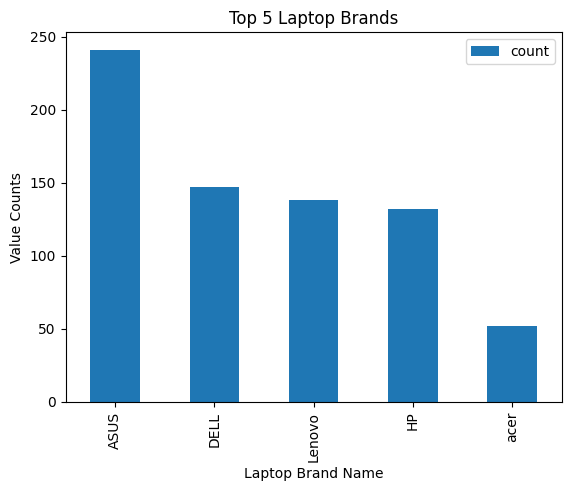

In [37]:
df['brand'].value_counts().head().plot(kind='bar')
plt.xlabel('Laptop Brand Name')
plt.ylabel('Value Counts')
plt.title('Top 5 Laptop Brands')
plt.legend()


#### Types of generation used in laptop mostly

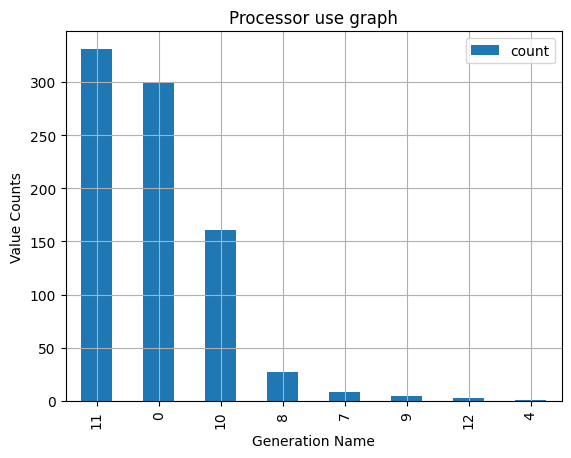

In [38]:
df['processor_gnrtn'].value_counts().plot(kind='bar')
plt.xlabel('Generation Name')
plt.ylabel('Value Counts')
plt.title('Processor use graph')
plt.grid()
plt.legend()

#### Types of operating system most used in laptops

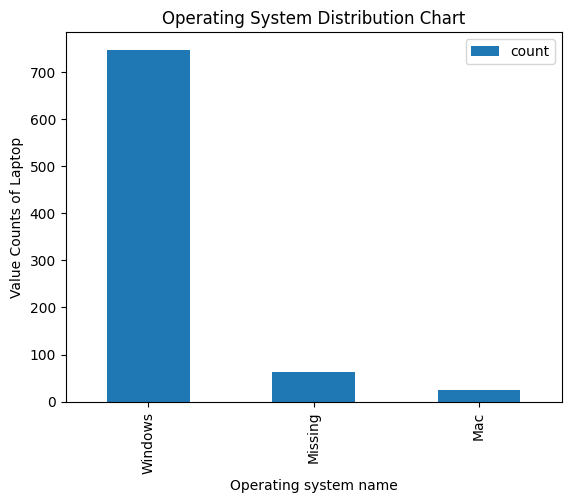

In [39]:
df['os'].value_counts().plot(kind='bar')
plt.title('Operating System Distribution Chart')
plt.xlabel('Operating system name')
plt.ylabel('Value Counts of Laptop')
plt.legend()

#### Number of laptops come with touch screen

<Axes: title={'center': 'Touchscreen Laptop'}, ylabel='Touchscreen'>

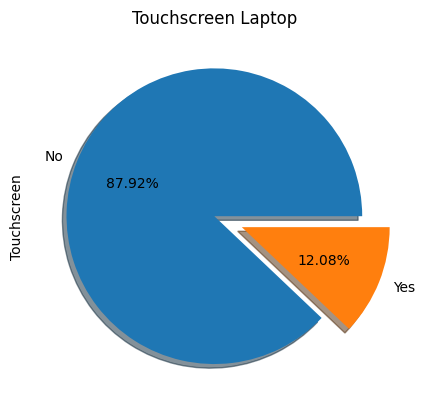

In [40]:
df['Touchscreen'].value_counts().plot(kind='pie', shadow =True, autopct = '%.2f%%', explode=(0.0, 0.2), title= 'Touchscreen Laptop', ylabel='Touchscreen')

#### The number of Laptops have installed MS - Office

<Axes: title={'center': 'Installed MS -Office'}, ylabel='MS-Office'>

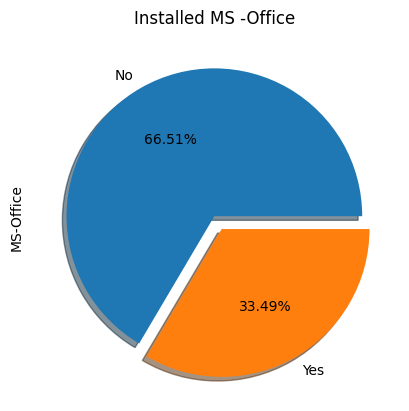

In [41]:
df['msoffice'].value_counts().plot(kind='pie', shadow =True, autopct = '%.2f%%', explode=(0.0, 0.1), title= 'Installed MS -Office', ylabel='MS-Office')

#### Laptop Comes with a Warranty

<Axes: title={'center': 'Warranty of Laptops (Year)'}, ylabel='Value counts of laptop'>

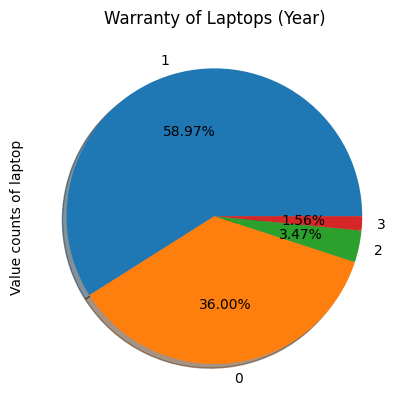

In [42]:
df['warranty'].value_counts().plot(kind='pie', shadow =True, autopct = '%.2f%%', explode=(0.0, 0.0, 0.0, 0.0), title= 'Warranty of Laptops (Year)', ylabel='Value counts of laptop')

#### Price vs Other Relationship Graph

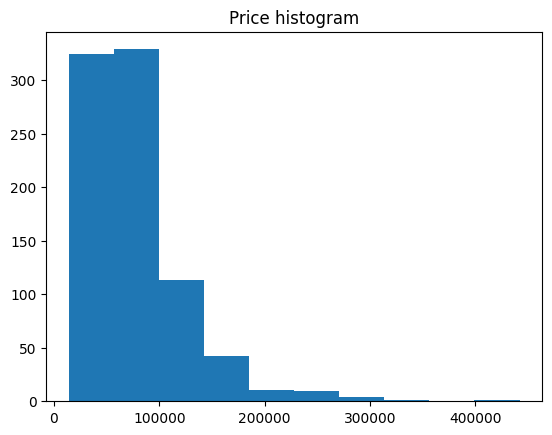

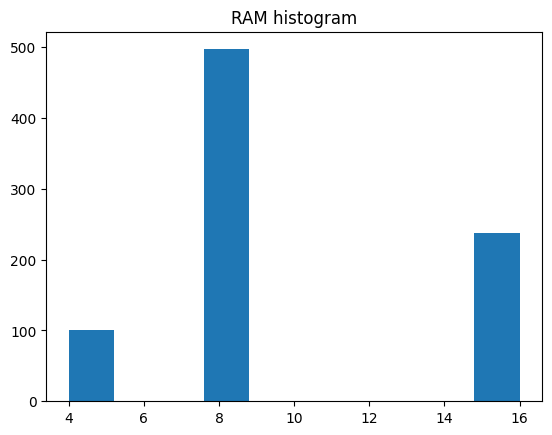

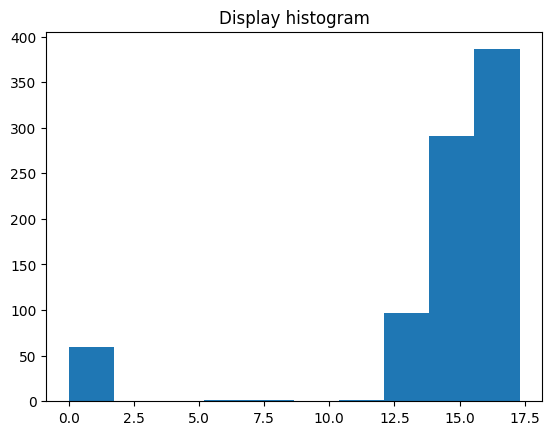

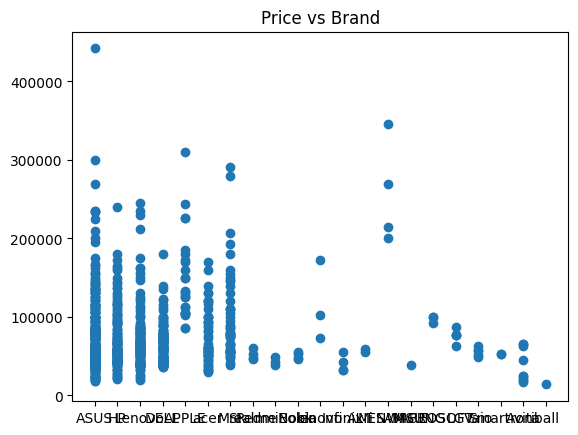

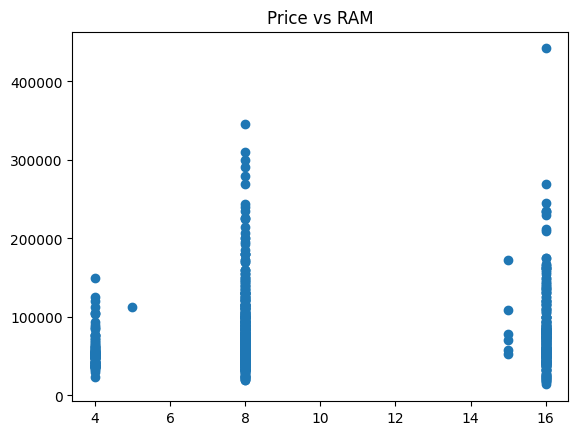

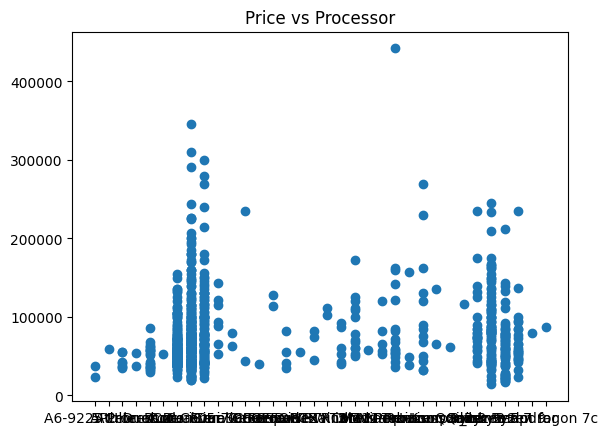

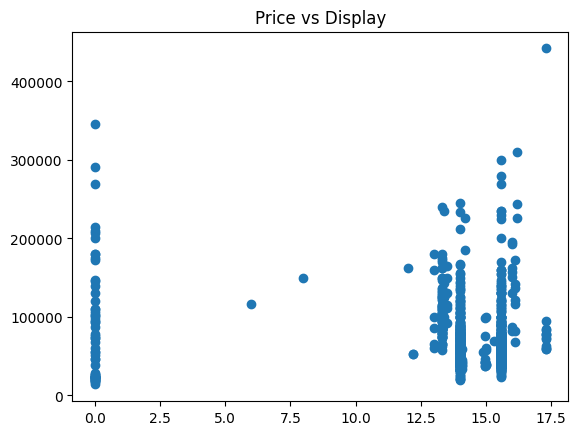

In [43]:
plt.hist(df.Price)
plt.title("Price histogram")
plt.show()
plt.hist(df.ram_gb)
plt.title("RAM histogram")
plt.show()
plt.hist(df.display_size)
plt.title("Display histogram")
plt.show()
plt.scatter(df.brand, df.Price)
plt.title("Price vs Brand")
plt.show()
plt.scatter(df.ram_gb, df.Price)
plt.title("Price vs RAM")
plt.show()
plt.scatter(df.processor_Name, df.Price)
plt.title("Price vs Processor")
plt.show()
plt.scatter(df.display_size, df.Price)
plt.title("Price vs Display")
plt.show()


#### Most Higher price Laptop

In [44]:
df[df['Price'] == df['Price'].max()]

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
625,ASUS,Zephyrus,Intel,M1 Processor,11,16,DDR4,3072,0,Windows,32,6,Casual,17.3,1,No,No,441990.0


#### Checking how laptop prices spread

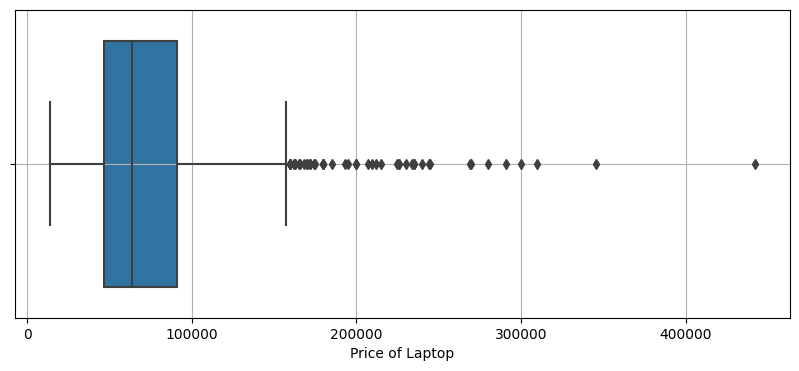

In [45]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Price')
plt.xlabel('Price of Laptop')
plt.grid()

## Features and Target Separation

In [46]:
df

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,Price
0,ASUS,Celeron,Intel,5,0,4,Cooling,0,1024,Windows,64,0,Casual,15.6,1,No,No,23990.000000
1,ASUS,VivoBook,Intel,5,10,4,DDR3,512,0,Windows,64,0,Casual,15.6,1,No,No,37990.000000
2,ASUS,Vivobook,Intel,A6-9225 Processor,10,4,DDR3,0,1024,Windows,64,0,Casual,14.1,1,No,No,59548.027778
3,HP,Core,Intel,APU Dual,11,4,DDR3,512,0,Windows,64,0,ThinNlight,15.6,1,No,Yes,54990.000000
4,HP,Core,Intel,APU Dual,11,4,DDR3,512,0,Windows,64,0,ThinNlight,15.6,0,No,No,54990.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,DELL,Inspiron,AMD,Ryzen 9,0,16,Unified,512,0,Windows,64,0,ThinNlight,15.6,0,No,No,42090.000000
841,HP,Pavilion,AMD,Ryzen 9,0,16,Unified,512,0,Windows,64,4,Gaming,15.6,1,No,Yes,64990.000000
842,ASUS,EeeBook,Intel,Ryzen 9,0,16,Unified,0,0,Windows,64,0,Casual,0.0,0,No,No,22990.000000
843,HP,Pavilion,AMD,Slot for,0,16,Unified,512,0,Windows,64,2,Casual,14.0,1,No,Yes,79990.000000


#### Selecting the final columns for further analysis and modeling 

In [47]:
df_final = df.drop(['brand', 'model', 'processor_brand', 'processor_Name', 'os', 'Apps', 'weight', 'msoffice'], axis=1)
df_final

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,display_size,warranty,Touchscreen,Price
0,0,4,0,1024,64,0,15.6,1,No,23990.000000
1,10,4,512,0,64,0,15.6,1,No,37990.000000
2,10,4,0,1024,64,0,14.1,1,No,59548.027778
3,11,4,512,0,64,0,15.6,1,No,54990.000000
4,11,4,512,0,64,0,15.6,0,No,54990.000000
...,...,...,...,...,...,...,...,...,...,...
840,0,16,512,0,64,0,15.6,0,No,42090.000000
841,0,16,512,0,64,4,15.6,1,No,64990.000000
842,0,16,0,0,64,0,0.0,0,No,22990.000000
843,0,16,512,0,64,2,14.0,1,No,79990.000000


##  Encoding
we have taken a column 'Touchscreen' to apply One Hot encoding through this as this is the categorical value also it can be important features.

In [48]:

df_encoded = pd.get_dummies(df, columns=['Touchscreen'])

df_encoded 

,brand,model,processor_brand,processor_Name,processor_gnrtn,ram_gb,Apps,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,msoffice,Price,Touchscreen_No,Touchscreen_Yes
0,ASUS,Celeron,Intel,5,0,4,Cooling,0,1024,Windows,64,0,Casual,15.6,1,No,23990.000000,True,False
1,ASUS,VivoBook,Intel,5,10,4,DDR3,512,0,Windows,64,0,Casual,15.6,1,No,37990.000000,True,False
2,ASUS,Vivobook,Intel,A6-9225 Processor,10,4,DDR3,0,1024,Windows,64,0,Casual,14.1,1,No,59548.027778,True,False
3,HP,Core,Intel,APU Dual,11,4,DDR3,512,0,Windows,64,0,ThinNlight,15.6,1,Yes,54990.000000,True,False
4,HP,Core,Intel,APU Dual,11,4,DDR3,512,0,Windows,64,0,ThinNlight,15.6,0,No,54990.000000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,DELL,Inspiron,AMD,Ryzen 9,0,16,Unified,512,0,Windows,64,0,ThinNlight,15.6,0,No,42090.000000,True,False
841,HP,Pavilion,AMD,Ryzen 9,0,16,Unified,512,0,Windows,64,4,Gaming,15.6,1,Yes,64990.000000,True,False
842,ASUS,EeeBook,Intel,Ryzen 9,0,16,Unified,0,0,Windows,64,0,Casual,0.0,0,No,22990.000000,True,False
843,HP,Pavilion,AMD,Slot for,0,16,Unified,512,0,Windows,64,2,Casual,14.0,1,Yes,79990.000000,True,False


## Feature Selection

In [49]:
df_encoded = df_encoded.drop(['brand', 'model', 'processor_brand', 'processor_Name', 'os', 'Apps', 'weight', 'msoffice'], axis=1 )
df_encoded

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,display_size,warranty,Price,Touchscreen_No,Touchscreen_Yes
0,0,4,0,1024,64,0,15.6,1,23990.000000,True,False
1,10,4,512,0,64,0,15.6,1,37990.000000,True,False
2,10,4,0,1024,64,0,14.1,1,59548.027778,True,False
3,11,4,512,0,64,0,15.6,1,54990.000000,True,False
4,11,4,512,0,64,0,15.6,0,54990.000000,True,False
...,...,...,...,...,...,...,...,...,...,...,...
840,0,16,512,0,64,0,15.6,0,42090.000000,True,False
841,0,16,512,0,64,4,15.6,1,64990.000000,True,False
842,0,16,0,0,64,0,0.0,0,22990.000000,True,False
843,0,16,512,0,64,2,14.0,1,79990.000000,True,False


## Checking Correlation between target and other column

In [50]:
df_encoded.corr().style.background_gradient()

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,display_size,warranty,Price,Touchscreen_No,Touchscreen_Yes
processor_gnrtn,1.000000,0.010767,0.083934,0.113440,0.179165,-0.093939,0.357125,0.100065,-0.055304,-0.093698,0.093698
ram_gb,0.010767,1.000000,-0.011054,0.039002,-0.079855,-0.013674,-0.098155,-0.145653,0.126916,-0.079946,0.079946
ssd,0.083934,-0.011054,1.000000,-0.437870,0.230409,0.269102,0.376570,0.186146,0.524535,-0.161256,0.161256
hdd,0.113440,0.039002,-0.437870,1.000000,0.000355,-0.067018,0.171270,-0.025742,-0.210068,0.158980,-0.158980
os_bit,0.179165,-0.079855,0.230409,0.000355,1.000000,-0.147358,0.468763,0.287461,-0.069172,-0.102161,0.102161
graphic_card_gb,-0.093939,-0.013674,0.269102,-0.067018,-0.147358,1.000000,-0.079390,-0.060307,0.483082,0.115558,-0.115558
display_size,0.357125,-0.098155,0.376570,0.171270,0.468763,-0.079390,1.000000,0.290991,-0.097380,-0.008259,0.008259
warranty,0.100065,-0.145653,0.186146,-0.025742,0.287461,-0.060307,0.290991,1.000000,0.025858,-0.167180,0.167180
Price,-0.055304,0.126916,0.524535,-0.210068,-0.069172,0.483082,-0.097380,0.025858,1.000000,-0.176851,0.176851
Touchscreen_No,-0.093698,-0.079946,-0.161256,0.158980,-0.102161,0.115558,-0.008259,-0.167180,-0.176851,1.000000,-1.000000


<Axes: >

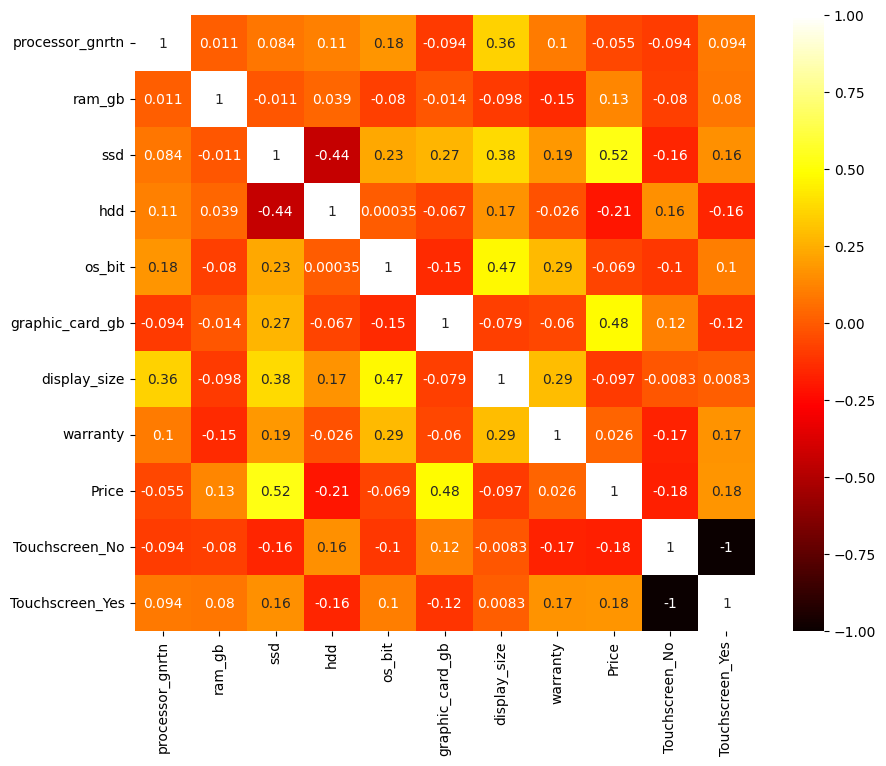

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(),annot=True, cmap='hot')

## Feature Scaling & PCA

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y = df_encoded['Price']

# Select the features for PCA
selected_features = df_encoded.drop(columns=['Price'])  # Exclude 'Price'

# Feature Scaling (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# PCA (Reduce dimensionality)
pca = PCA(n_components=2)  # You can choose the number of components you want to keep
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=pca_components, columns=[['PCA1', 'PCA2']])

# Calculate the correlation between 'Price' and the PCA components
correlation_matrix = pd.concat([y, df_pca], axis=1).corr()

# Print the correlation matrix
correlation_matrix

,Price,"(PCA1,)","(PCA2,)"
Price,1.000000,5.955392e-03,1.161669e-02
"(PCA1,)",0.005955,1.000000e+00,2.489230e-16
"(PCA2,)",0.011617,2.489230e-16,1.000000e+00


## Model Preperation

#### Right Now there's already three variations of dataframe for predicting which are  

- Original cleaned Dataframe (df)
- One Hot Encoded Dataframe (df_encoded)
- PCA applied Dataframe (df_pca)

Since our main goal is to find the Predict the price of laptops with its features.. we'll first use df_encoded dataframe. 

we are using this via linear Regression model and random forest regression model

In [53]:
x_encoded = df_encoded.drop('Price', axis=1)
x_encoded

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,display_size,warranty,Touchscreen_No,Touchscreen_Yes
0,0,4,0,1024,64,0,15.6,1,True,False
1,10,4,512,0,64,0,15.6,1,True,False
2,10,4,0,1024,64,0,14.1,1,True,False
3,11,4,512,0,64,0,15.6,1,True,False
4,11,4,512,0,64,0,15.6,0,True,False
...,...,...,...,...,...,...,...,...,...,...
840,0,16,512,0,64,0,15.6,0,True,False
841,0,16,512,0,64,4,15.6,1,True,False
842,0,16,0,0,64,0,0.0,0,True,False
843,0,16,512,0,64,2,14.0,1,True,False


In [54]:
y_encoded = df_encoded['Price']
y_encoded

0      23990.000000
1      37990.000000
2      59548.027778
3      54990.000000
4      54990.000000
           ...     
840    42090.000000
841    64990.000000
842    22990.000000
843    79990.000000
844    86999.000000
Name: Price, Length: 836, dtype: float64

In [55]:
x_encoded.shape, y_encoded.shape

((836, 10), (836,))

## Train Test Split 

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded, random_state=42, test_size= 0.2)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((668, 10), (668,), (168, 10), (168,))

#### Creating Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression
lr_encoded = LinearRegression()
lr_encoded.fit(x_train, y_train)

LinearRegression()

In [58]:
pred_encoded = lr_encoded.predict(x_test)
pred_encoded

array([110886.59666241,  69766.91486027,  88266.61110258, 154176.8846605 ,
        41049.30830301,  95502.99020351,  81251.68611796,  41261.58185741,
        88106.48673347,  55176.32893053,  72226.33698165,  44562.18652777,
        88106.48673347,  42960.94283676,  32999.77343087,  66613.51231812,
        44722.31089687,  66613.51231812,  49154.12489617,  41528.74409697,
        68647.60264498,  60351.836872  ,  69124.54333117,  86505.24304246,
        72824.03729094, 108634.54710049,  88106.48673347,  62617.67749039,
        77075.251472  , 105666.32695076,  96363.24181164,  61220.01479086,
        58631.70055813,  59104.79926563,  76264.6980251 ,  91242.52417117,
        53078.07866178,  37213.59784439,  86561.01092274,  41261.58185741,
       246854.13903776, 137921.94726627,  56652.34291223,  69487.53924879,
        70477.79450996,  40508.48648336,  55228.96598538,  87462.97157641,
       102887.20210812,  69172.89168691, 103290.02669906,  56032.396511  ,
        46801.31715836,  

In [59]:
score_encoded = lr_encoded.score(x_test, y_test)
score_encoded

0.5851032495220807

#### PCA Dataframe

In [60]:
x_pca = df_pca
x_pca

,PCA1,PCA2
0,-0.961818,-1.115613
1,0.466658,-1.217052
2,-0.641421,-1.447445
3,0.510932,-1.269845
4,-0.016354,-0.912403
...,...,...
831,-0.572074,0.261454
832,-0.215683,-0.063414
833,-2.399621,2.488638
834,-0.260740,0.129466


In [61]:
y_pca = df_encoded['Price']
y_pca

0      23990.000000
1      37990.000000
2      59548.027778
3      54990.000000
4      54990.000000
           ...     
840    42090.000000
841    64990.000000
842    22990.000000
843    79990.000000
844    86999.000000
Name: Price, Length: 836, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_pca, random_state=42, test_size=0.2)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((668, 2), (668,), (168, 2), (168,))

In [63]:
from sklearn.linear_model import LinearRegression
lr_pca = LinearRegression()
lr_pca.fit(x_train, y_train)

LinearRegression()

In [64]:
pred_pca = lr_pca.predict(x_test)
pred_pca

array([ 80255.62161661,  75988.86558522,  71192.3262676 ,  75074.78615197,
        71730.26272872, 109535.63111627,  80367.65946714,  71784.10562331,
        71288.06118074,  66309.32012704,  75685.81965088,  71719.91250855,
        71288.06118074,  72677.26163991,  70871.90314878,  72583.86560721,
        71624.17759541,  72583.86560721,  74373.90149862,  66169.33519923,
        73148.69718669,  72179.41629497,  76625.18457492,  72245.4103121 ,
        78026.0937538 ,  75556.32567531,  71288.06118074,  72992.02379708,
        75490.26290003,  72214.7535939 ,  74091.57041943,  65134.82839274,
        71304.36411814,  73002.37401726,  62023.31525497,  70245.14948663,
        63951.0618168 ,  72042.68600545, 107424.19172514,  71784.10562331,
        76289.22554639,  74999.8119762 ,  70778.50711609,  67572.12901921,
        64973.4891431 ,  70453.39473874,  65790.85334665,  75202.22554277,
        74921.75004086,  64121.77090571, 107093.21039042,  67220.66590452,
        63449.28763331,  

In [65]:
score_pca = lr_pca.score(x_test, y_test)
score_pca

0.028523943523378503

#### Modeling with Original Dataframe

In the original dataframe we have to drop that categorical value 'Touchscreen' for its least importancy among those column

In [66]:
x_orig = df_final.drop(['Price', 'Touchscreen'], axis=1)
x_orig

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,display_size,warranty
0,0,4,0,1024,64,0,15.6,1
1,10,4,512,0,64,0,15.6,1
2,10,4,0,1024,64,0,14.1,1
3,11,4,512,0,64,0,15.6,1
4,11,4,512,0,64,0,15.6,0
...,...,...,...,...,...,...,...,...
840,0,16,512,0,64,0,15.6,0
841,0,16,512,0,64,4,15.6,1
842,0,16,0,0,64,0,0.0,0
843,0,16,512,0,64,2,14.0,1


In [67]:
y_orig = df_final['Price']
y_orig

0      23990.000000
1      37990.000000
2      59548.027778
3      54990.000000
4      54990.000000
           ...     
840    42090.000000
841    64990.000000
842    22990.000000
843    79990.000000
844    86999.000000
Name: Price, Length: 836, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_orig, y_orig, random_state=42, test_size=0.2)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((668, 8), (668,), (168, 8), (168,))

In [69]:
from sklearn.linear_model import LinearRegression
lr_orig = LinearRegression()
lr_orig.fit(x_train, y_train)

LinearRegression()

In [70]:
pred_orig = lr_orig.predict(x_test)
pred_orig

array([114173.64760574,  76240.53989249,  90076.25630734, 158753.47431466,
        45655.31672511,  81001.89121622,  84804.09105914,  43035.96999277,
        89833.26305551,  52783.6218088 ,  77081.26875247,  47743.74227873,
        89833.26305551,  45313.80976045,  34122.00125589,  71020.31766712,
        47986.73553056,  71020.31766712,  51182.78713317,  43392.20948735,
        73004.28491851,  62224.45508756,  72426.57158504,  87403.33053722,
        74822.51751004, 114414.55617012,  89833.26305551,  64234.79572062,
        82985.85846761, 105100.68241745,  96403.36031443,  63374.2195603 ,
        60706.69976073,  62146.370167  ,  73083.78199775,  91999.79922446,
        52817.60840208,  39112.78803045,  68425.47681757,  43035.96999277,
       253291.71624506, 141526.41144951,  59828.50916256,  73112.79985757,
        67842.03451219,  42995.94875601,  56020.68967246,  95654.54202409,
       108213.53444011,  69801.6780154 ,  86361.7448591 ,  57893.26002115,
        46039.11612336,  

In [71]:
score_orig = lr_orig.score(x_test, y_test)
score_orig

0.5826602963756051

## Model Accuracy

#### The Score result of three 

In [72]:
print(f'The accuracy rate for Encoded dataframe: {score_encoded}')
print(f'The score for PCA Dataframe: {score_pca}')
print(f'The Score for the Original Dataframe: {score_orig}')

The accuracy rate for Encoded dataframe: 0.5851032495220807
The score for PCA Dataframe: 0.028523943523378503
The Score for the Original Dataframe: 0.5826602963756051


we can see among those three, the accuracy results of twos are coming around 58% . so in that case, either we can make model through encoded or original data too.

In [74]:
input_data = np.array([[10,16,512,1024,64,2,15.6,1,False,True]])
prediction = lr_encoded.predict(input_data)
print('The Price for your given featured laptop is: ', prediction)

The Price for your given featured laptop is:  [119793.44662444]


C:\Users\shoai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Random Forest Model implemantation with best accuracy of previous model 

In [75]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded, random_state = 42, test_size = 0.2)

In [76]:
rf_encoded = RandomForestRegressor(n_estimators=100, random_state=42)
rf_encoded.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
pred_rf = rf_encoded.predict(x_test)
pred_rf

array([ 86914.88904762,  51709.35933333,  97310.95      , 137016.30333333,
        39706.464     ,  87751.9572578 ,  30632.76398601,  99016.67904762,
        84543.62698413,  44611.93089161,  66237.85090643,  40760.63111111,
        84543.62698413,  40802.19269841,  38756.87644279,  62579.37821649,
        49702.81220238,  62579.37821649,  26637.45133333,  51699.48583333,
       139166.84547619,  68422.1984127 ,  33168.07904762,  80347.76406926,
        46999.70577631,  94466.81965873,  84543.62698413,  50517.19047619,
       132063.87      ,  96001.90666667,  67417.15333333,  48555.48932179,
        56463.97107143,  51700.42816173,  67332.30104167,  95878.55619048,
        56865.5       ,  38557.91995983,  62650.60154401,  99016.67904762,
       189234.        , 111006.86666667,  56619.51190476,  42518.64777778,
        65438.06095238,  42154.80222222,  65261.76      , 105586.51333333,
       130665.22152381,  64874.7397619 ,  98792.26095238,  47742.58133333,
        65507.06      ,  

In [78]:
score_rf = rf_encoded.score(x_test, y_test)
score_rf

0.5581136799361093

In [79]:
print('The Accuracy score for Linear Regression Model: ', score_encoded)
print('The Accuracy for Random FOrest Regression: ', score_rf)

The Accuracy score for Linear Regression Model:  0.5851032495220807
The Accuracy for Random FOrest Regression:  0.5581136799361093


#### It Seems the Linear Regression Model with Encoded Dataframe is giving better accuracy than others. In that case, we'll use Linear Regression Model with Encoded dataframe to predict the price of Laptop.

## Cross Value Function and accuracy

In [85]:
from sklearn.model_selection import cross_val_score

final_score = cross_val_score(lr_encoded, x_encoded, y_encoded, cv = 5)
mean_accuracy = final_score.mean()

print(f'Cross-Validation Accuracy: {mean_accuracy:.2f}')

Cross-Validation Accuracy: 0.35


## Save the Model

In [86]:
import pickle

filename = 'assignment_Machine_model.pkl'
pickle.dump(lr_encoded, open(filename, 'wb'))